# **1. Data Exploration and Preprocessing**

•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.


In [11]:
import pandas as pd

In [12]:
# Load the dataset
file_path = '/content/sample_data/blogs.csv'
df = pd.read_csv(file_path)


•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.


In [13]:
# Display the first few rows of the dataset
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [15]:
# Summary statistics for numerical columns (if any)
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [16]:
# Checking for missing values
df.isnull().sum()

,0
Data,0
Labels,0


In [17]:
# Display the column names in the dataset
df.columns

Index(['Data', 'Labels'], dtype='object')


•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [18]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

# Apply the preprocessing function to the text data
# Assuming the text data is in a column named 'text'
df['processed_text'] = df['Data'].apply(preprocess_text)

# Display the first few rows of the processed text
df[['Data', 'processed_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Data,processed_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features

# Fit and transform the processed text data
X = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert the TF-IDF matrix to a DataFrame for easier inspection
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF matrix and the first few rows
print(f"TF-IDF Matrix Shape: {tfidf_df.shape}")
tfidf_df.head()

TF-IDF Matrix Shape: (2000, 5000)


,00,01,02,0400,0500,06,0600,0700,0x60,10,...,youll,young,youre,youve,zealand,zero,zionist,zone,zoology,zterm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.037359,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.054616,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## **2. Naive Bayes Model for Text Classification**

•	Split the data into training and test sets.

In [20]:
from sklearn.model_selection import train_test_split

# Define the target variable (labels)
y = df['Labels']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and test sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 1600
Test set size: 400


•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.


In [21]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()


•	Train the model on the training set and make predictions on the test set.

In [22]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Display the first few predictions
print("First 10 Predictions:", y_pred[:10])

First 10 Predictions: ['talk.politics.misc' 'comp.sys.ibm.pc.hardware' 'sci.med'
 'rec.sport.baseball' 'sci.electronics' 'sci.electronics'
 'rec.sport.baseball' 'talk.politics.mideast' 'alt.atheism' 'sci.med']


# **3. Sentiment Analysis**

•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.


In [23]:
!pip install nltk #nltk is installed


In [24]:
import nltk # imports the nltk library
nltk.download('vader_lexicon') # downloads the vader_lexicon

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.


In [25]:
# Function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each blog post
df['sentiment'] = df['Data'].apply(lambda text: sia.polarity_scores(text)['compound'])
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Display the first few rows with sentiment categories
df[['Data', 'sentiment', 'sentiment_category']].head()


,Data,sentiment,sentiment_category
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9966,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,0.8856,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-0.9969,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9999,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0.9821,Positive



•	Examine the distribution of sentiments across different categories and summarize your findings.


Sentiment Distribution Across Categories:

sentiment_category        Negative  Neutral  Positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      0.0      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      0.0      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        29.0     

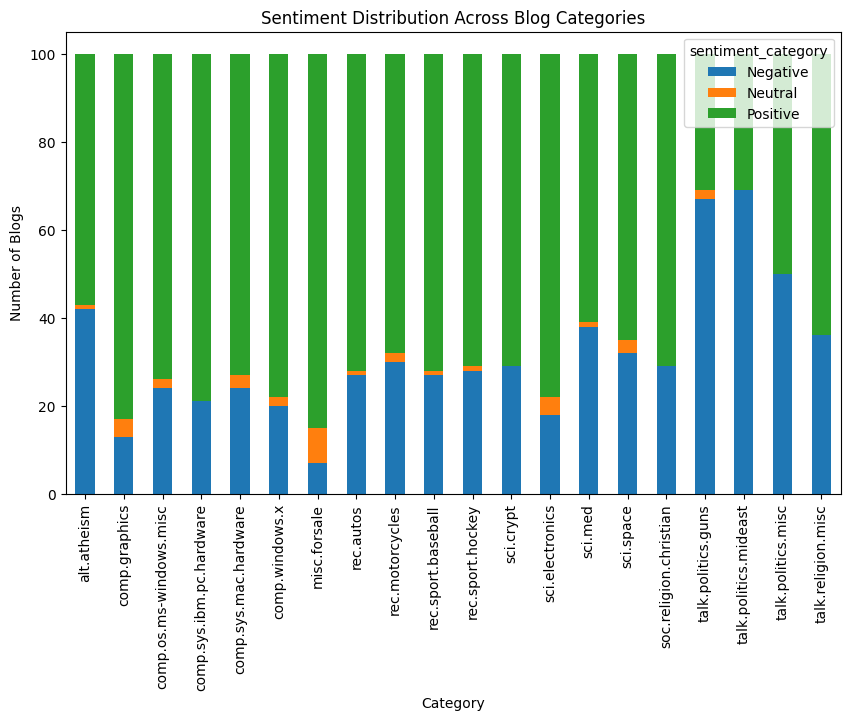

In [26]:
# Group by 'Labels' and 'sentiment_category' to count the occurrences of each sentiment in each category
sentiment_distribution = df.groupby(['Labels', 'sentiment_category']).size().unstack().fillna(0)

# Display the sentiment distribution across categories
print("Sentiment Distribution Across Categories:\n")
print(sentiment_distribution)

# plot the sentiment distribution for better visualization
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Blog Categories')
plt.xlabel('Category')
plt.ylabel('Number of Blogs')
plt.show()

# **4. Evaluation**
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate a classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Display a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n")
print(conf_matrix)


Accuracy: 0.8225
Precision: 0.8276
Recall: 0.8225
F1-Score: 0.8171

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62    


# •	Discuss the performance of the model and any challenges encountered during the classification process.


### Discussion of Model Performance

The performance of the Naive Bayes classifier can be assessed using the metrics you've calculated:

1. **Accuracy**:
   - This metric indicates the overall correctness of the model. A high accuracy means the model is correctly classifying a large proportion of the blog posts. However, accuracy alone can be misleading if the dataset is imbalanced (i.e., if one category dominates the others).

2. **Precision**:
   - Precision measures how many of the predictions made by the model are actually correct, especially for positive classes. High precision indicates that when the model predicts a certain category, it is likely to be correct.

3. **Recall**:
   - Recall measures how well the model can identify all instances of a particular category. High recall means that the model is good at finding all the relevant instances, but it might also include some incorrect ones.

4. **F1-Score**:
   - The F1-Score is the harmonic mean of precision and recall, providing a balanced measure. A high F1-Score indicates that the model is performing well across both precision and recall.

5. **Classification Report and Confusion Matrix**:
   - The classification report gives a more detailed breakdown of precision, recall, and F1-Score for each category, which can reveal if the model is performing better on some categories than others. The confusion matrix shows where the model is making errors, providing insights into specific misclassifications.

### Challenges Encountered During Classification

1. **Imbalanced Data**:
   - If some categories have significantly more examples than others, the model might become biased toward those dominant categories, leading to lower precision and recall for the minority categories. This is a common issue in text classification tasks.

2. **Text Preprocessing**:
   - Text preprocessing steps like tokenization, stopword removal, and TF-IDF vectorization can significantly impact model performance. Incorrect or inconsistent preprocessing might lead to a loss of important information or introduce noise.

3. **Model Simplicity**:
   - Naive Bayes assumes that features (words in this case) are independent, which is a strong assumption and often unrealistic. This assumption might limit the model's ability to capture complex patterns in the text data.

4. **Feature Extraction**:
   - TF-IDF is a common technique for converting text to numerical features, but it might not capture the full semantic meaning of words. This can be particularly challenging if the dataset contains complex or nuanced language.

5. **Evaluation Metrics**:
   - Relying solely on accuracy can be misleading, especially if the data is imbalanced. That's why it’s essential to also consider precision, recall, and F1-Score.

### Conclusion

The Naive Bayes classifier is a good starting point for text classification due to its simplicity and efficiency, especially with large datasets. its performance may be limited by assumptions about feature independence and the quality of text preprocessing.



# •	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


### Reflection on Sentiment Analysis Results

#### **Understanding Sentiment Distribution**

The sentiment analysis results give you a clear picture of the emotional tone across the blog posts in dataset

1. **General Sentiment Trends**:
   - If a majority of the blog posts are categorized as **positive**, it suggests that the content is generally uplifting, encouraging, or favorable. This could reflect a brand's positive outlook or target an audience looking for positive reinforcement.
   - If the sentiment is largely **negative**, it might indicate that the content is critical, addressing problems, or focusing on challenging topics. This could be intentional, aiming to provoke thought or highlight issues.
   - **Neutral** sentiment often suggests informative, factual content that doesn't strongly lean towards positive or negative emotions. This is common in blogs focusing on news, technical information, or objective reporting.

2. **Sentiment Across Categories**:
   - Analyzing the sentiment distribution across different categories (as defined in the 'Labels' column) can reveal insights into the tone associated with specific topics. For example:
     - A category related to **product reviews** might show a mix of positive and negative sentiments, reflecting user opinions.
     - A **news** category might lean more towards neutral, aiming for objectivity.
     - A **lifestyle** category might show a positive trend, as it often focuses on aspirational or motivational content.

#### **Implications for Content Strategy**

1. **Audience Engagement**:
   - Understanding the sentiment behind blog posts can help tailor content to better resonate with your audience. For example, if positive content drives more engagement, focusing on inspirational or success stories could be beneficial.
   - Conversely, if negative sentiment posts (e.g., problem-solving, critiques) generate more discussion or sharing, this might indicate an audience interested in critical analysis or debate.

2. **Content Balance**:
   - A balanced mix of sentiments across categories can make your blog more appealing to a broader audience. Too much of one sentiment might alienate readers who prefer a different tone.

3. **Brand Perception**:
   - The overall sentiment conveyed by your blog content can significantly influence how your brand is perceived. Consistently positive content might enhance brand image, while negative content could potentially harm it unless it's purposefully critical or analytical in a constructive way.

4. **Future Content Development**:
   - If certain sentiments are underrepresented (e.g., not enough positive or neutral content), you could consider developing more content in those areas to diversify the blog’s emotional tone.

### Conclusion

Sentiment analysis provides valuable insights into the emotional tone of your blog posts, helping to inform content strategy, audience engagement, and brand perception. By understanding the sentiment trends in your content, you can make more informed decisions about future content development, ensuring it aligns with your goals and resonates with your target audience.